In [14]:
#initialising
import matplotlib.pyplot as plt

#manually extracted from matlab code using Jwon345 as input
reflectors = {
    1: [8.54,-5.23],
    2: [-7.41,9.69],
    3: [9.63,6.93],
    4: [-8.2,5.89],
    5: [3.72,8.01],
    6: [8.58,5.6],
    7: [-7.16,6.73],
    8: [7.69,-3.58],
    9: [-9.6,4.85],
    10: [-3.15,3.29]
    }



9.69


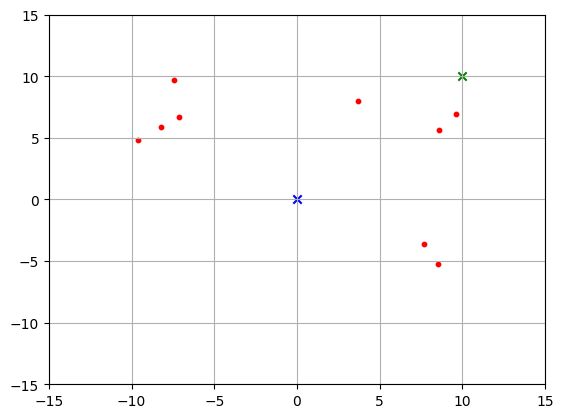

In [26]:
#plotting the reflectors
for i in range(1,10):
    plt.scatter(
    reflectors[i][0],
    reflectors[i][1],
    color = "red",
    s=10
    )

plt.scatter(0,0, color = "blue", marker="x") #plotting the transmitter
plt.scatter(10,10, color = "green", marker="x") #plotting the reciever

plt.grid(True)
plt.xlim(-15,15)
plt.ylim(-15,15)

plt.show()